In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mdptoolbox.mdp as mdp



In [3]:
import mdptoolbox.example as mdp_example


In [ ]:
P, r  = mdp_example.forest(10,r1 = 4*,r2 = 2, is_sparse = False)

In [5]:
P

array([[[0.1, 0.9, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0.1, 0. , 0.9, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0.1, 0. , 0. , 0.9, 0. , 0. , 0. , 0. , 0. , 0. ],
        [0.1, 0. , 0. , 0. , 0.9, 0. , 0. , 0. , 0. , 0. ],
        [0.1, 0. , 0. , 0. , 0. , 0.9, 0. , 0. , 0. , 0. ],
        [0.1, 0. , 0. , 0. , 0. , 0. , 0.9, 0. , 0. , 0. ],
        [0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0.9, 0. , 0. ],
        [0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.9, 0. ],
        [0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.9],
        [0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.9]],

       [[1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [1. , 0. , 0. , 0. , 0. , 0. ,

In [8]:
r

array([[0., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [4., 2.]])

In [21]:
pi = mdp.PolicyIteration(P,r,0.9)

In [22]:
pi.run()

In [23]:
pi.policy

(0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

custum reward

In [35]:
r[:,1] = 4*np.arange(0,10,1)

In [36]:
r

array([[ 0.,  0.],
       [ 0.,  4.],
       [ 0.,  8.],
       [ 0., 12.],
       [ 0., 16.],
       [ 0., 20.],
       [ 0., 24.],
       [ 0., 28.],
       [ 0., 32.],
       [ 4., 36.]])

In [37]:
max_age = 10
fire_probs = np.arange(0, 1.001, 0.001)
gammas = np.arange(0.01, 1, 0.001)

# Initialize array to store policies: shape (len(fire_probs), len(gammas), max_age)
policies = np.zeros((len(fire_probs), len(gammas), max_age), dtype=int)

for i, fire_prob in enumerate(fire_probs):
    P, _ = mdp_example.forest(max_age, r1=4, r2=2, p=fire_prob, is_sparse=False)
    for j, gamma in enumerate(gammas):
        pi = mdp.PolicyIteration(P, r, gamma)
        pi.run()
        policies[i, j, :] = pi.policy 

In [10]:
policies.shape

(1001, 990, 10)

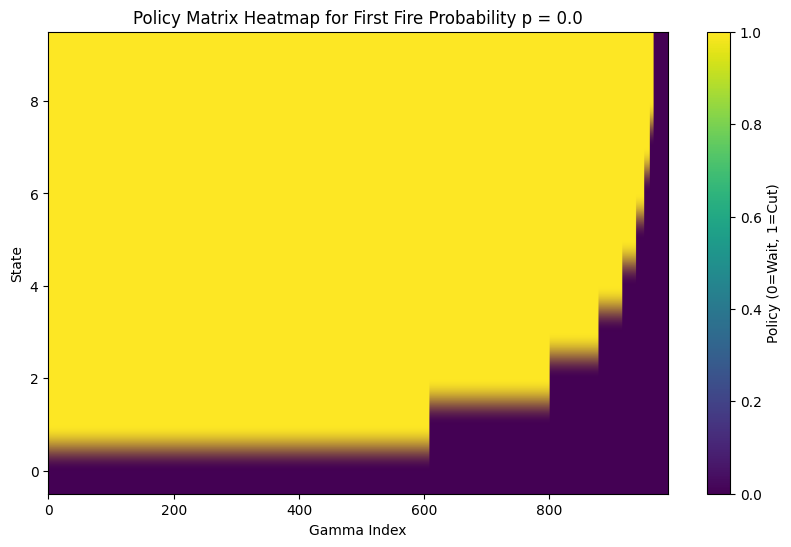

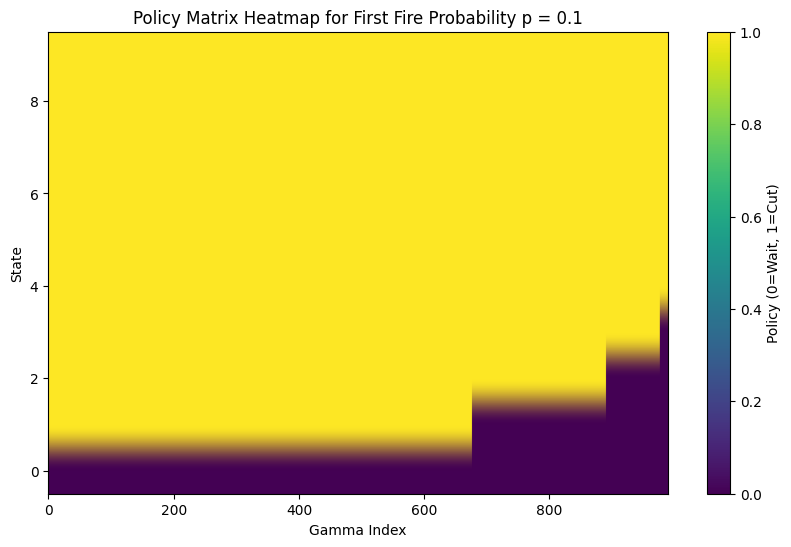

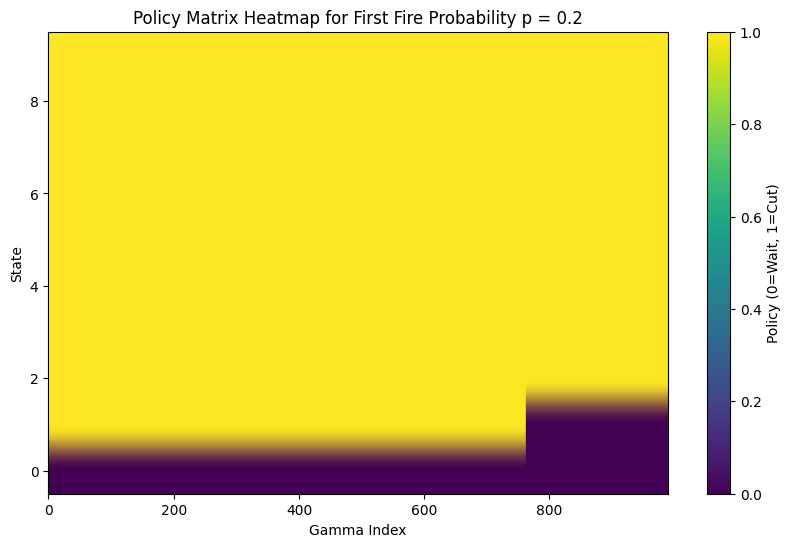

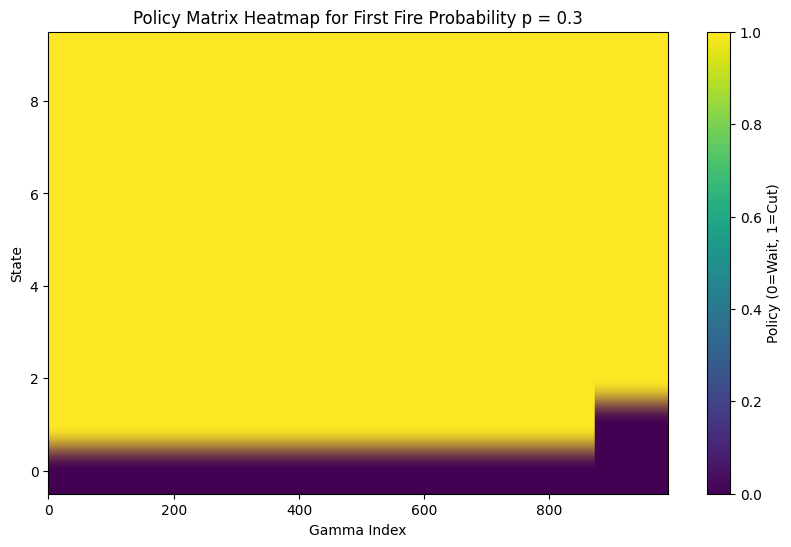

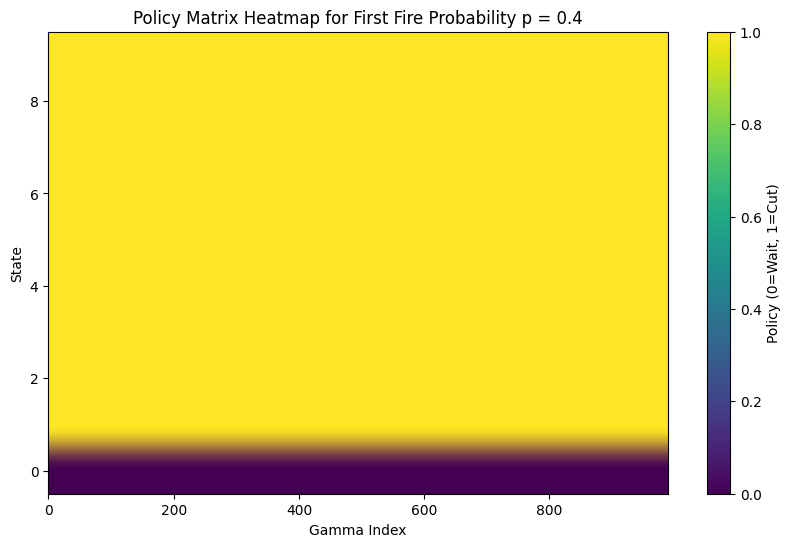

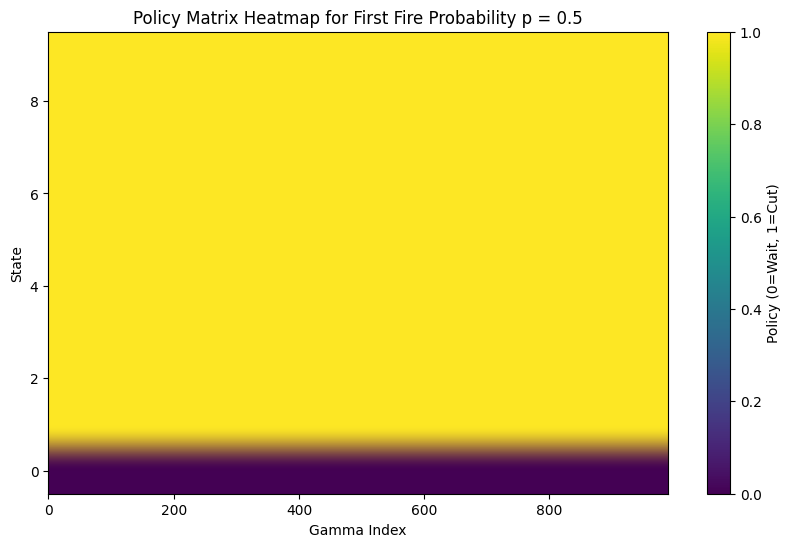

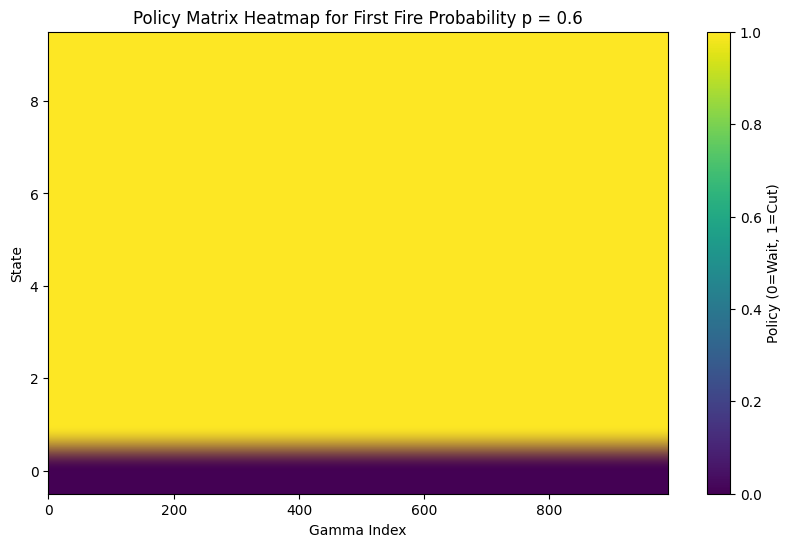

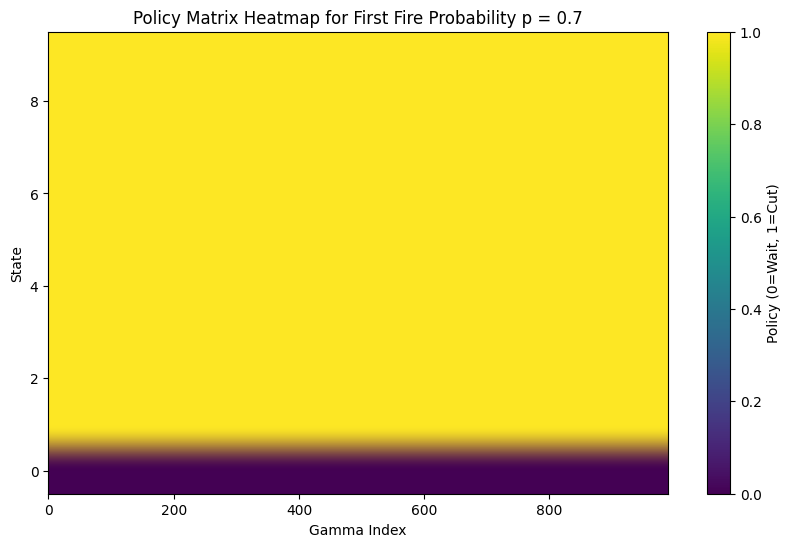

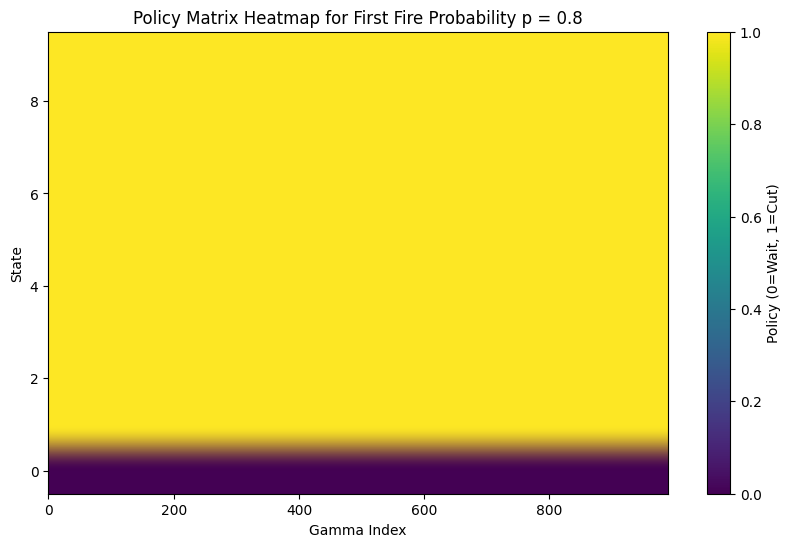

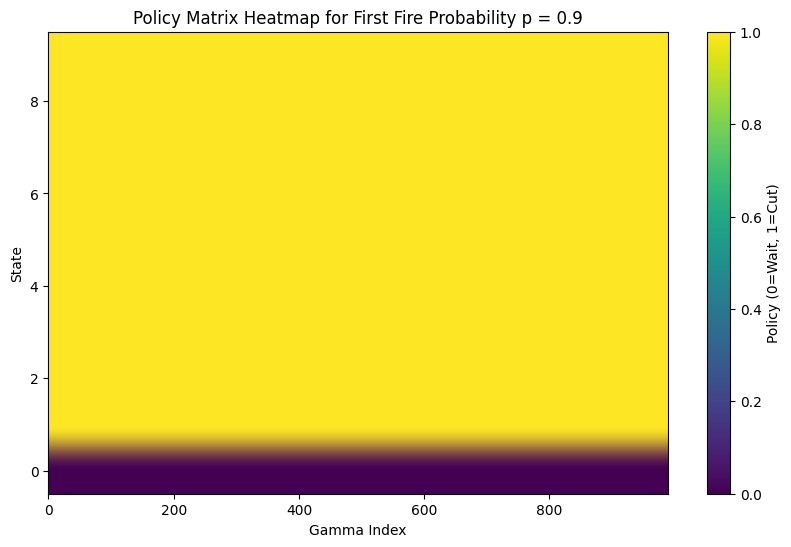

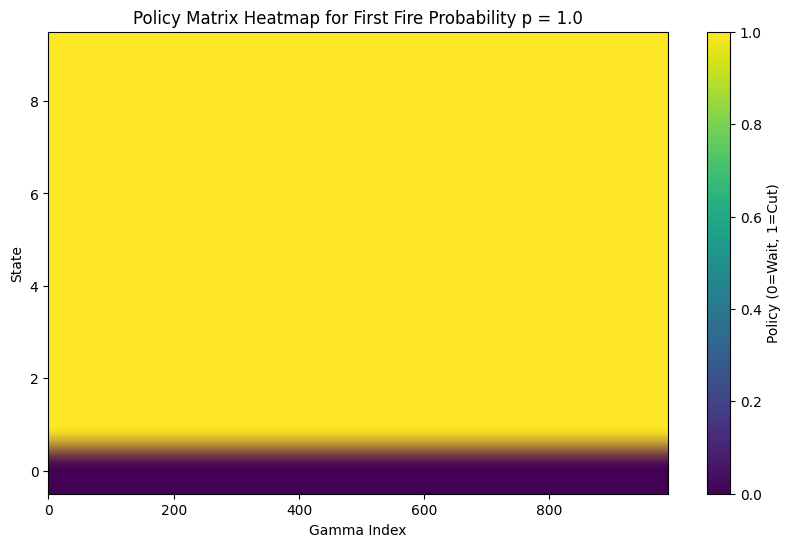

In [38]:
for i in range(0, policies.shape[0]):
    if i == 0 or i%100 == 0 : 
        plt.figure(figsize=(10, 6))
        plt.imshow(policies[i, :, :].T, aspect='auto', origin='lower', cmap='viridis')
        plt.colorbar(label='Policy (0=Wait, 1=Cut)')
        plt.xlabel('Gamma Index')
        plt.ylabel('State')
        plt.title(f'Policy Matrix Heatmap for First Fire Probability p = {i/1000}')
        plt.show()

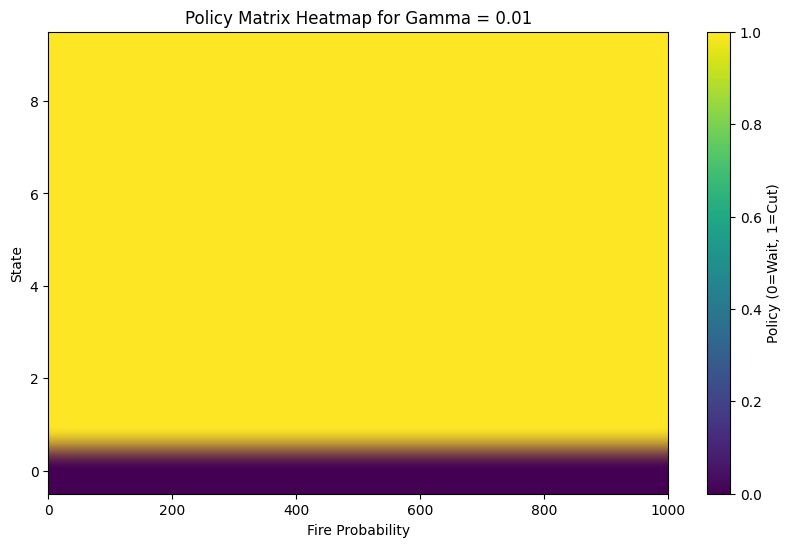

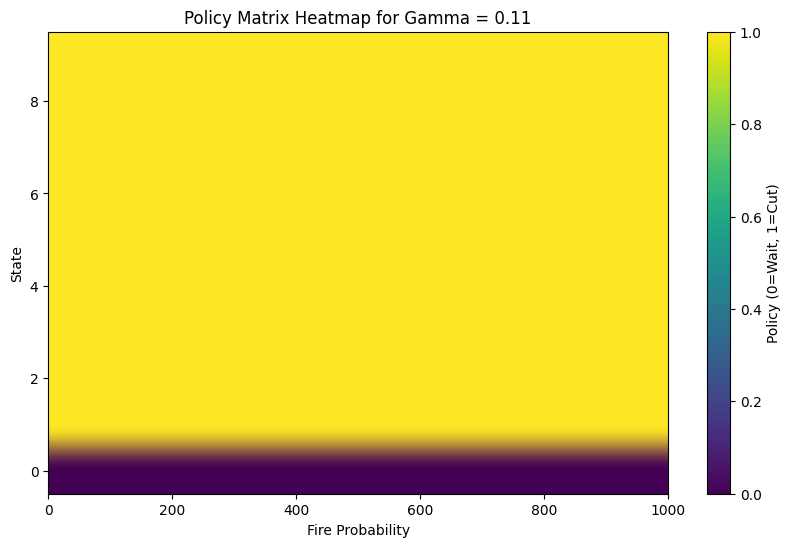

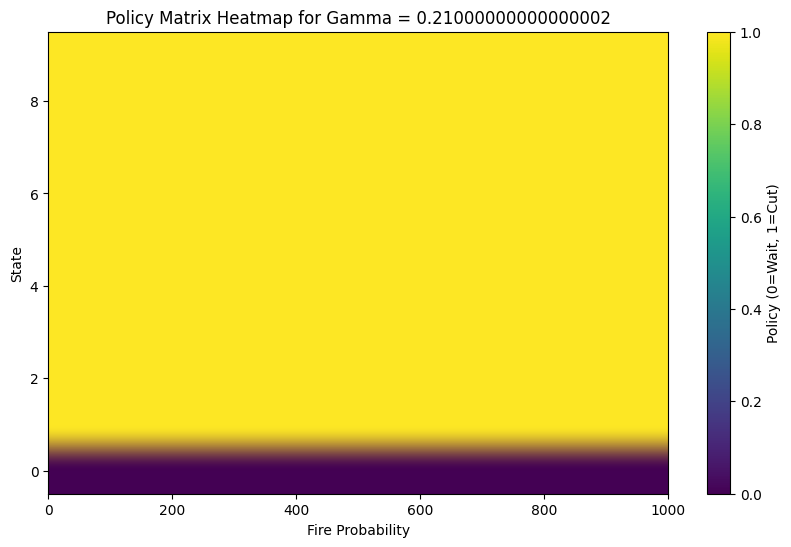

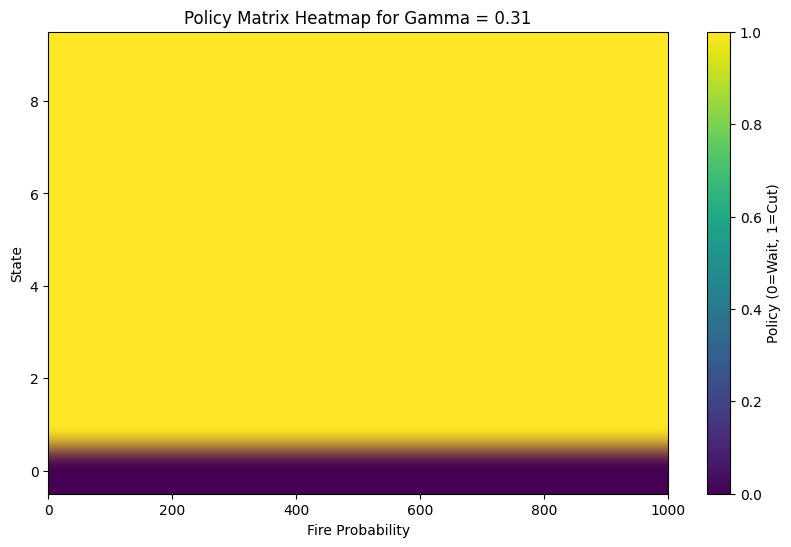

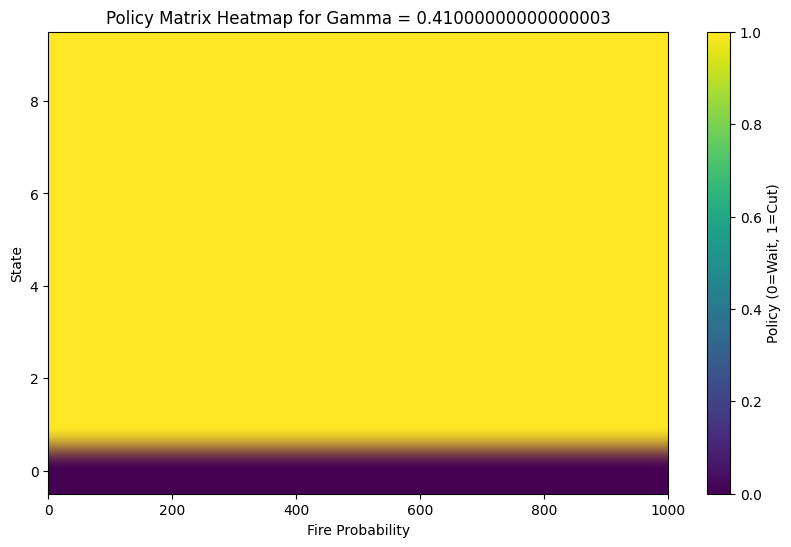

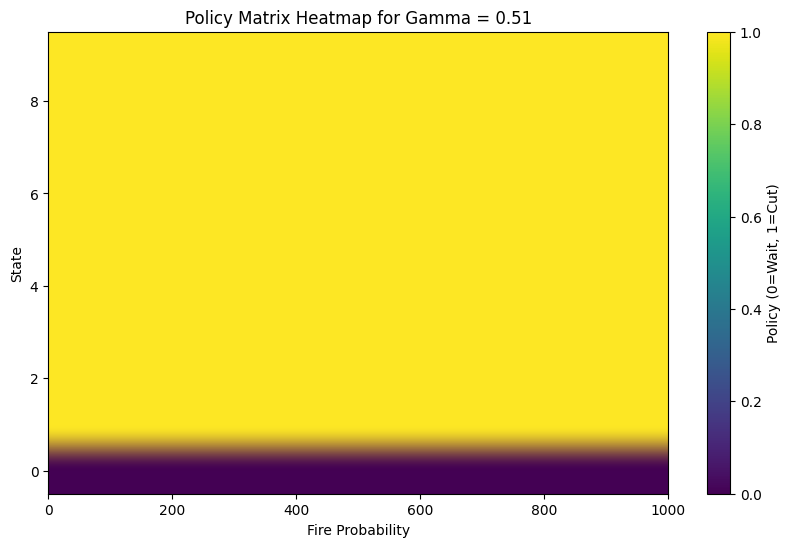

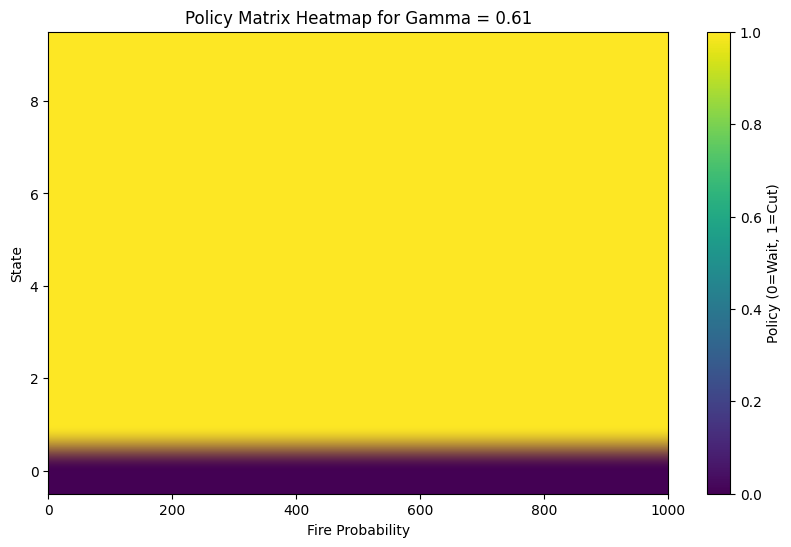

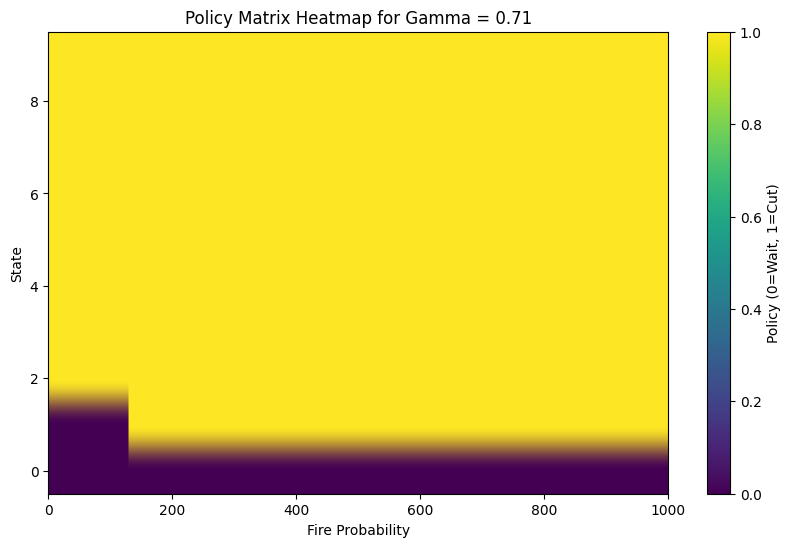

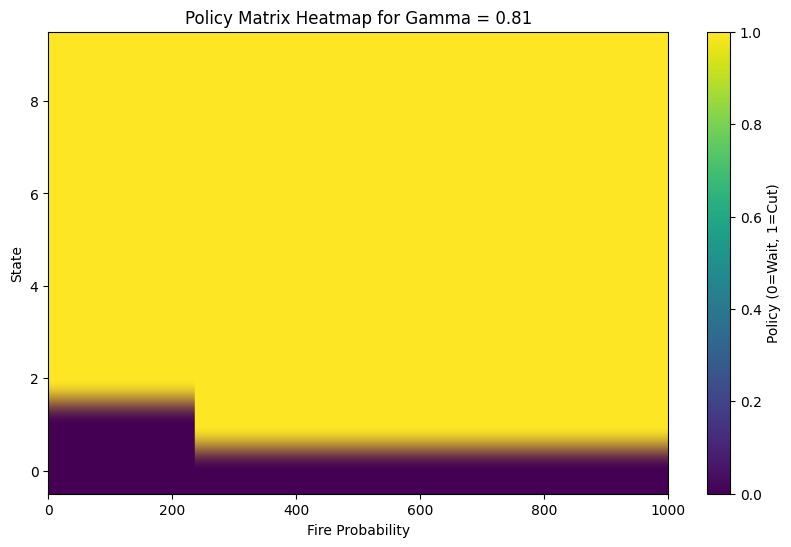

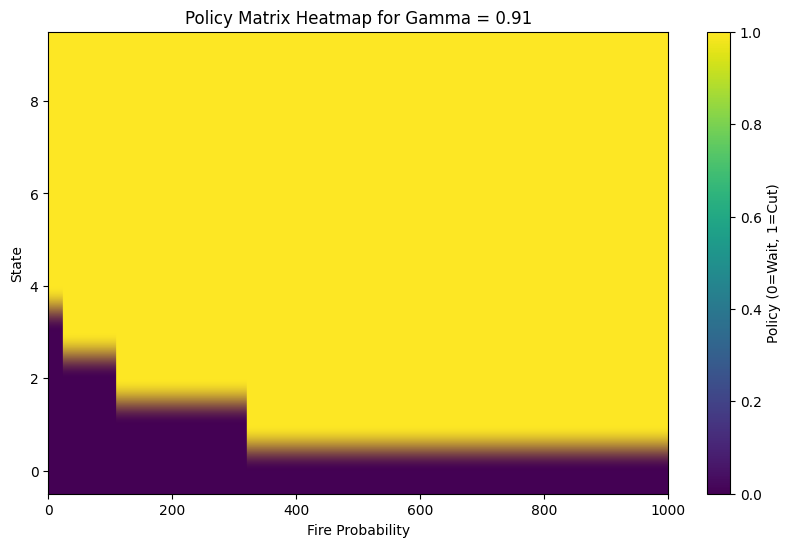

In [39]:
for i in range(0, policies.shape[1]):
    if i == 0 or i%100 == 0 : 
        
        plt.figure(figsize=(10, 6))
        plt.imshow(policies[:, i, :].T, aspect='auto', origin='lower', cmap='viridis')
        plt.colorbar(label='Policy (0=Wait, 1=Cut)')
        plt.xlabel('Fire Probability')
        plt.ylabel('State')
        plt.title(f'Policy Matrix Heatmap for Gamma = {(i/1000) + 0.01}')
        plt.show()